In [2]:
# Imports

import glob
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy

In [3]:
# Constantes

IMAGE_SIZE = 300
CLASSES = ['TOEI', 'GB', 'WIT']

In [4]:
!git clone https://github.com/Cooleure/BD_Animes.git
files_path = "./BD_Animes/"

fatal: destination path 'BD_Animes' already exists and is not an empty directory.


In [5]:
# Load data

def load_data(folder_path, classes, image_size=64):

  # Place aléatoirement les images dans les sous-ensembles train, validation et test
  # En récupérant les images dans chaque dossier film

  # Initialisation des sous-ensembles
  train = {'x': [], 'y': []}
  validation = {'x': [], 'y': []}
  test = {'x': [], 'y': []}

  # Liste les dossiers de films présents dans le dossier path
  #movies_folder_path = [nom for nom in os.listdir(folder_path) if (os.path.isdir(os.path.join(folder_path, nom)) and not nom.startswith('.'))]
  #movies_folder_path = [os.path.join(folder_path, sub_folder) for sub_folder in movies_folder_path]

  files = glob.glob(folder_path + "/**/*.jpg", recursive = True)
  print(files)
  x_and_y_tuple = []
  # Load data pour chaque film
  for file in files:


    #x_and_y_tuple des images
    x_and_y_tuple.append(load_data_movie_file(file, classes, image_size))

  # Nombre d'images
  n = len(x_and_y_tuple)

  # Indices aléatoires
  indices = np.random.permutation(n)

  # Séparation des données
  train_indices = indices[:int(0.8*n)]
  validation_indices = indices[int(0.8*n):int(0.9*n)]
  test_indices = indices[int(0.9*n):]

  # Ajout des données
  train['x'] = [x_and_y_tuple[i][0] for i in train_indices ]
  train['y'] = [x_and_y_tuple[i][1] for i in train_indices ]
  validation['x'] = [x_and_y_tuple[i][0] for i in validation_indices ]
  validation['y'] = [x_and_y_tuple[i][1] for i in validation_indices ]
  test['x'] = [x_and_y_tuple[i][0] for i in test_indices ]
  test['y'] = [x_and_y_tuple[i][1] for i in test_indices ]

  return train, validation, test

def load_data_movie_file(file, classes, image_size=64):

  # Lecture de l'image + mise à l'échelle
  img = Image.open(file)
  img = img.resize((image_size, image_size), Image.LANCZOS)

  # Image + Label
  x = np.asarray(img)
  y = load_label(file, classes)

  return x, y

def load_label(path, classes):
  img_path_split = path.split('/')
  img_name_split = img_path_split[-1].split('_')
  return classes.index(img_name_split[0])


In [6]:
# Data subsets

# Train, validation, test
train, val, test = load_data(files_path, CLASSES, image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
train['x'] = np.array(train['x'])
val['x'] = np.array(val['x'])
test['x'] = np.array(test['x'])

train['y'] = np.array(train['y'])
val['y'] = np.array(val['y'])
test['y'] = np.array(test['y'])

['./BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_125.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_120.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_36.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_8.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_75.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_52.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_24.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_111.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_80.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_4.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_31.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_1.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_39.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_9.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_30.jpg', './BD_Animes/WIT/SNK/Output_WIT_SNK_S2E1/WIT_SNK_S2E1_9

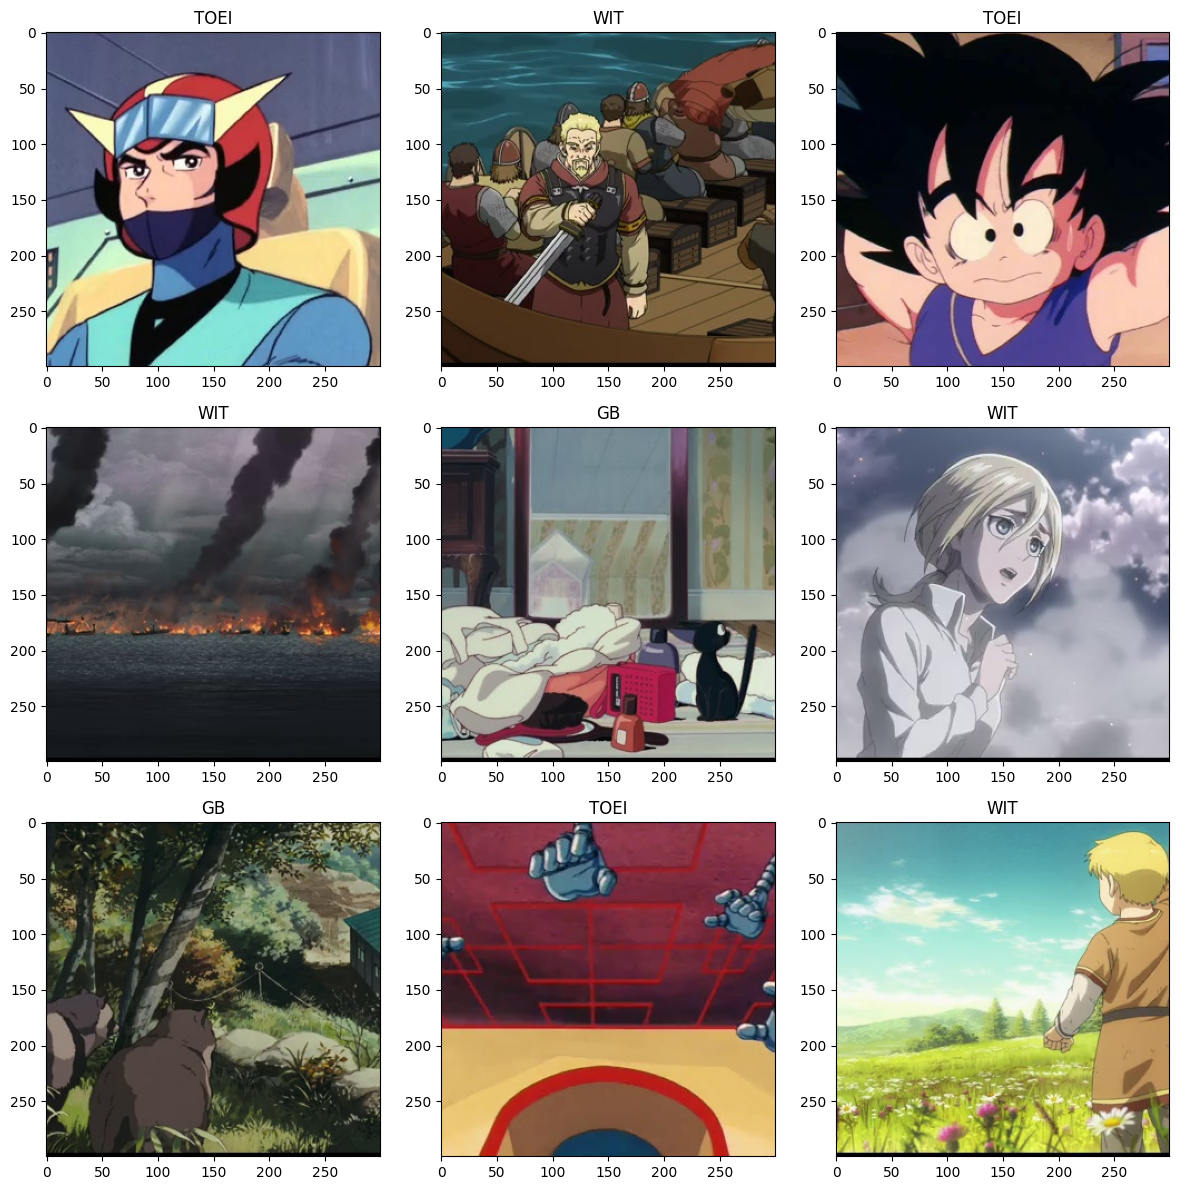

In [7]:
# Randomisation des indices

indices = np.arange(len(train['x']))
np.random.shuffle(indices)

# Affichage de 9 images aléatoires de la base d'apprentissage
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    random_index = indices[i]  # Utiliser les indices aléatoires
    plt.title(CLASSES[int(train['y'][random_index])])
    plt.imshow(train['x'][random_index])
plt.tight_layout()
plt.show()

In [7]:
# Reshape
from keras.utils import to_categorical
train['y'] = to_categorical(train['y'])
val['y'] = to_categorical(val['y'])


In [9]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(3, activation='softmax'))   # Couche de sortie

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [11]:
history = model.fit(train['x'], train['y'], validation_data=(val['x'], val['y']), epochs=10, batch_size=100)

Epoch 1/10
46/46 [==============================] - 20s 213ms/step - loss: 6.0023 - accuracy: 0.4285 - val_loss: 0.8939 - val_accuracy: 0.5785
Epoch 2/10
46/46 [==============================] - 6s 125ms/step - loss: 0.7687 - accuracy: 0.6762 - val_loss: 0.6258 - val_accuracy: 0.7372
Epoch 3/10
46/46 [==============================] - 6s 129ms/step - loss: 0.6092 - accuracy: 0.7609 - val_loss: 0.6245 - val_accuracy: 0.7637
Epoch 4/10
46/46 [==============================] - 6s 125ms/step - loss: 0.4828 - accuracy: 0.8067 - val_loss: 0.5112 - val_accuracy: 0.8201
Epoch 5/10
46/46 [==============================] - 6s 129ms/step - loss: 0.3569 - accuracy: 0.8636 - val_loss: 0.5986 - val_accuracy: 0.7566
Epoch 6/10
46/46 [==============================] - 6s 127ms/step - loss: 0.2794 - accuracy: 0.9004 - val_loss: 0.4633 - val_accuracy: 0.8166
Epoch 7/10
46/46 [==============================] - 6s 128ms/step - loss: 0.2158 - accuracy: 0.9290 - val_loss: 0.5492 - val_accuracy: 0.8113
Epoch

In [13]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

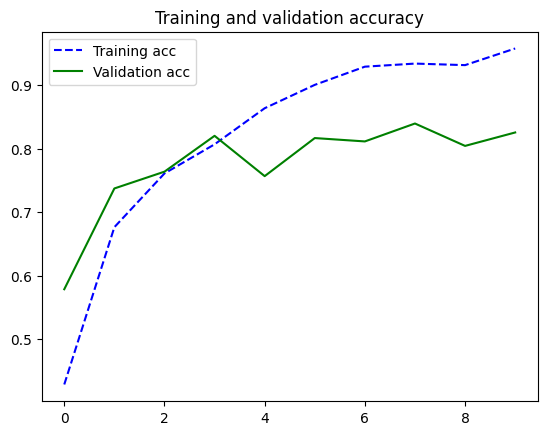

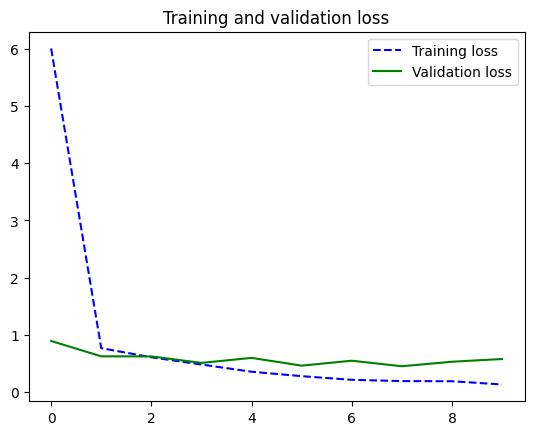

In [13]:
plot_training_analysis()

18/18 [==============================] - 1s 39ms/step


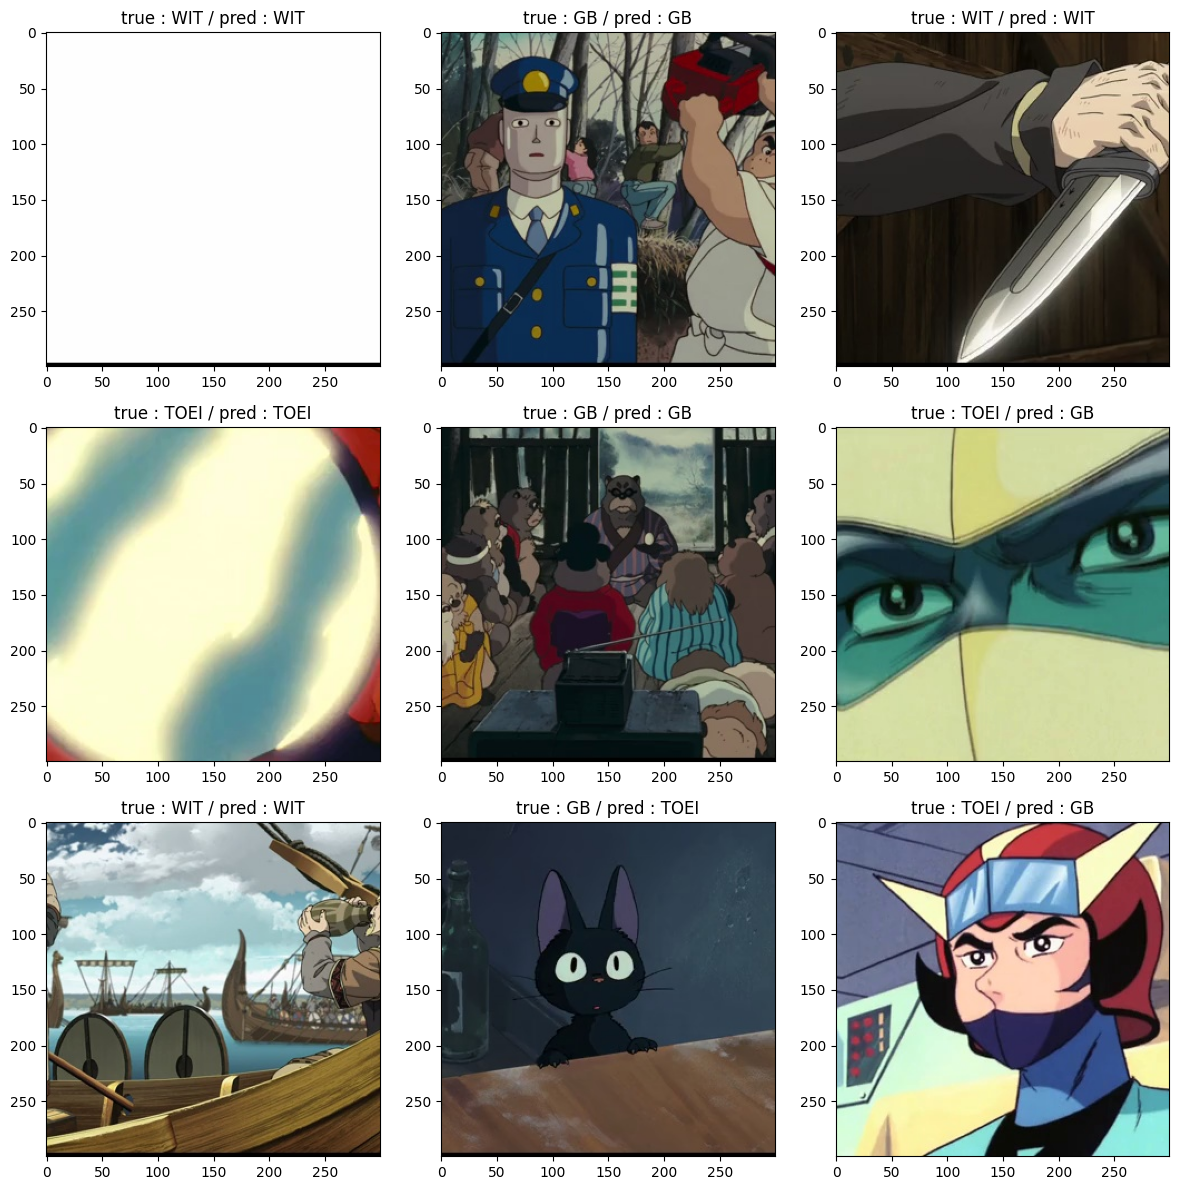

In [14]:
indices = np.arange(len(test['x']))
np.random.shuffle(indices)

plt.figure(figsize=(12, 12))
predictions = model.predict(test['x'])

for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    random_index = indices[i]  # Utiliser les indices aléatoires

    classe_attendue = str(CLASSES[int(test['y'][random_index])])
    classe_predite = str(CLASSES[np.argmax(predictions[random_index])])

    plt.title("true : " + classe_attendue + " / pred : " + classe_predite)
    plt.imshow(test['x'][random_index])

plt.tight_layout()
plt.show()

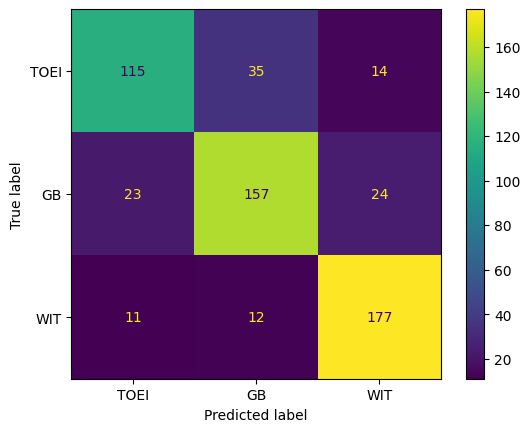

In [56]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = test['y']
predicted = [np.argmax(i) for i in predictions]

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = CLASSES)

cm_display.plot()
plt.show()

In [48]:
from tensorflow.keras.applications import VGG16

conv_vgg16 = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [59]:
conv_vgg16.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 152, 152, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [52]:
train_features = conv_vgg16.predict(train['x'])
train_features = np.reshape(train_features,(train_features.shape[0],9*9*512))

val_features = conv_vgg16.predict(val['x'])
val_features = np.reshape(val_features,(val_features.shape[0],9*9*512))

18/18 [==============================] - 10s 609ms/step


In [54]:
# A COMPLETER
model_vgg16 = Sequential()

model_vgg16.add(Dense(256, activation='relu', input_dim=41472))
model_vgg16.add(Dense(3, activation='softmax'))

model_vgg16.summary()

model_vgg16.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model_vgg16.fit(train_features, train['y'],
                    epochs=10,
                    batch_size=100,
                    validation_data=(val_features, val['y']))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               10617088  
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 10617859 (40.50 MB)
Trainable params: 10617859 (40.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
46/46 [==============================] - 2s 23ms/step - loss: 2.6133 - accuracy: 0.7388 - val_loss: 0.5082 - val_accuracy: 0.8166
Epoch 2/10
46/46 [==============================] - 1s 16ms/step - loss: 0.1647 - accuracy: 0.9460 - val_loss: 0.4843 - val_accuracy: 0.8554
Epoch 3/10
46/46 [==============================] - 1s 16ms/step - loss: 0.0443 - accuracy: 0.9899 - val_loss: 0.4502 - val_ac

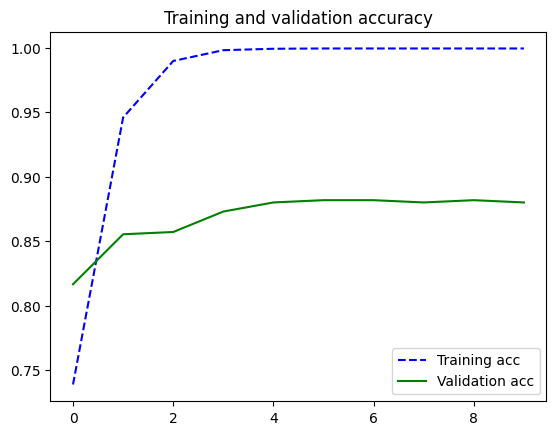

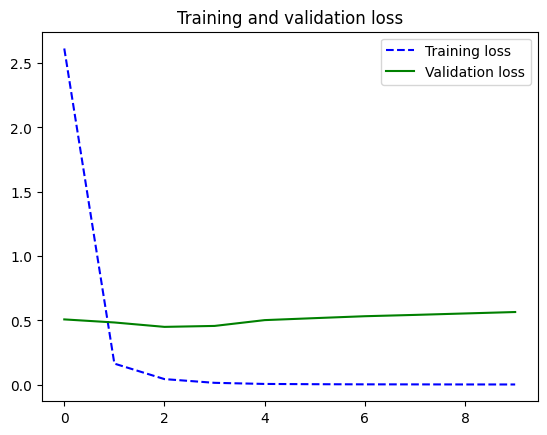

In [55]:
plot_training_analysis()

In [57]:
actual = test['y']
predictions = model_vgg16.predict(test['x'])

predicted = [np.argmax(i) for i in predictions]
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = CLASSES)

cm_display.plot()
plt.show()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 41472), found shape=(None, 300, 300, 3)


In [8]:
from tensorflow.keras.applications import VGG19

conv_resnet152V2 = VGG19(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [9]:
conv_resnet152V2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [10]:
train_features = conv_resnet152V2.predict(train['x'])
train_features = np.reshape(train_features,(train_features.shape[0],9*9*512))

val_features = conv_resnet152V2.predict(val['x'])
val_features = np.reshape(val_features,(val_features.shape[0],9*9*512))

18/18 [==============================] - 11s 652ms/step


In [11]:
model_resnet152V2 = Sequential()

model_resnet152V2.add(Dense(256, activation='relu', input_dim=41472))
model_resnet152V2.add(Dense(3, activation='softmax'))

model_resnet152V2.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT
model_resnet152V2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

# COMPLETER AVEC LES TENSEURS SUR LESQUELS EFFECTUER L'APPRENTISSAGE
history = model_resnet152V2.fit(train_features, train['y'],
                    epochs=10,
                    batch_size=100,
                    validation_data=(val_features, val['y']))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10617088  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 10617859 (40.50 MB)
Trainable params: 10617859 (40.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
46/46 [==============================] - 3s 24ms/step - loss: 2.0085 - accuracy: 0.7318 - val_loss: 0.4289 - val_accuracy: 0.8536
Epoch 2/10
46/46 [==============================] - 1s 18ms/step - loss: 0.1439 - accuracy: 0.9504 - val_loss: 0.4028 - val_accuracy: 0.8730
Epoch 3/10
46/46 [==============================] - 1s 19ms/step - loss: 0.0305 - accuracy: 0.9929 - val_loss: 0.4214 - val_accu

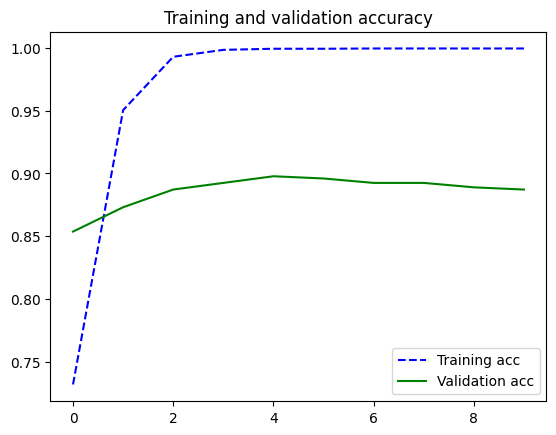

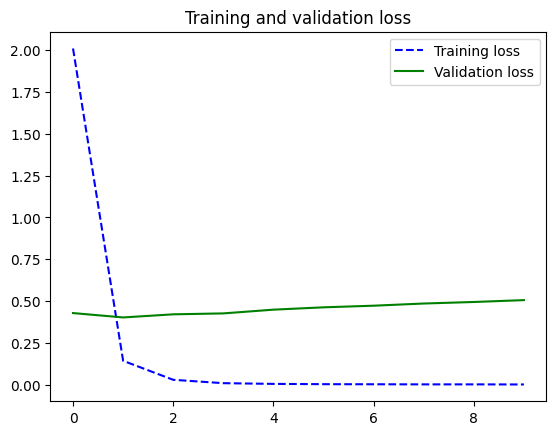

In [14]:
plot_training_analysis()

In [1]:
actual = test['y']
predictions = model_resnet152V2.predict(to_categorical(test['x'])) # to categorical ??

predicted = [np.argmax(i) for i in predictions]
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = CLASSES)

cm_display.plot()
plt.show()

NameError: name 'test' is not defined